In [1]:
!pip install plotly==4.7.1 cufflinks
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')



     |████████████████████████████████| 11.5 MB 7.9 MB/s eta 0:00:01    |█▎                              | 460 kB 3.7 MB/s eta 0:00:04
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
4.7.1


NameError: name 'per' is not defined

In [ ]:
print(plotly.__version__)

Malnutrition is a condition that results from eating a diet in which one or more nutrients are either not enough or are too much such that the diet causes health problems. It may involve calories, protein, carbohydrates, fat, vitamins or minerals. Not enough nutrients is called undernutrition or undernourishment while too much is called overnutrition. 

People also often get infections and are frequently cold. The symptoms of micronutrient deficiencies depend on the micronutrient that is lacking. [Source](https://en.wikipedia.org/wiki/Malnutrition).

# Import Data and Overview

In [2]:
data = pd.read_csv('malnutrition-estimates.csv')
data_by_country = pd.read_csv('country-wise-average.csv')
data.drop(['Unnamed: 0','ISO code','Survey Year','Source','Report Author','Notes','Short Source'], axis=1, inplace=True)
data.head()

Country  Year  Income Classification  LDC  LIFD  LLDC or SID2  \
0  AFGHANISTAN  1997                      0 1.00  1.00          1.00   
1  AFGHANISTAN  2004                      0 1.00  1.00          1.00   
2  AFGHANISTAN  2013                      0 1.00  1.00          1.00   
3  AFGHANISTAN  2018                      0 1.00  1.00          1.00   
4      ALBANIA  1997                      2 0.00  0.00          0.00   

  Survey Sample (N)  Severe Wasting  Wasting  Overweight  Stunting  \
0             4,846             nan    18.20        6.50     53.20   
1               946            3.50     8.60        4.60     59.30   
2         44,26,469            4.00     9.50        5.30     40.40   
3               NaN            1.60     5.10        4.10     38.20   
4             7,642             nan     8.10        9.50     20.40   

   Underweight  U5 Population ('000s)  
0        44.90                3838.88  
1        32.90                4789.35  
2        24.60                5444.57  
3        19.10                5601.44  
4         7.10                 309.23

In [3]:
data.columns

Index(['Country', 'Year', 'Income Classification', 'LDC', 'LIFD',
       'LLDC or SID2', 'Survey Sample (N)', 'Severe Wasting', 'Wasting',
       'Overweight', 'Stunting', 'Underweight', 'U5 Population ('000s)'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 13 columns):
Country                  924 non-null object
Year                     924 non-null int64
Income Classification    924 non-null int64
LDC                      924 non-null float64
LIFD                     924 non-null float64
LLDC or SID2             924 non-null float64
Survey Sample (N)        861 non-null object
Severe Wasting           696 non-null float64
Wasting                  877 non-null float64
Overweight               788 non-null float64
Stunting                 887 non-null float64
Underweight              902 non-null float64
U5 Population ('000s)    924 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 94.0+ KB


In [5]:
data.describe().T

count    mean      std     min     25%     50%     75%  \
Year                  924.00 2003.73     8.79 1983.00 1996.00 2004.50 2011.00   
Income Classification 924.00    1.24     0.92    0.00    1.00    1.00    2.00   
LDC                   924.00    0.35     0.48    0.00    0.00    0.00    1.00   
LIFD                  924.00    0.42     0.49    0.00    0.00    0.00    1.00   
LLDC or SID2          924.00    0.46     0.69    0.00    0.00    0.00    1.00   
Severe Wasting        696.00    2.19     1.91    0.00    0.80    1.60    2.90   
Wasting               877.00    6.96     5.04    0.00    2.90    5.90    9.70   
Overweight            788.00    6.43     4.64    0.00    2.90    5.50    8.70   
Stunting              887.00   29.06    15.83    0.00   16.65   29.20   40.20   
Underweight           902.00   15.84    12.51    0.00    4.93   13.40   23.10   
U5 Population ('000s) 924.00 6182.70 16795.94    1.00  559.67 1795.52 4194.21   

                            max  
Year                    2019.00  
Income Classification      3.00  
LDC                        1.00  
LIFD                       1.00  
LLDC or SID2               2.00  
Severe Wasting            12.90  
Wasting                   25.30  
Overweight                30.10  
Stunting                  73.60  
Underweight               66.80  
U5 Population ('000s) 132966.78

# Handling Missing values

In [6]:
# Check missing values in the dataframe
data.isnull().sum()

Country                    0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Survey Sample (N)         63
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
U5 Population ('000s)      0
dtype: int64

In [7]:
columns = list(['Severe Wasting', 'Wasting','Overweight', 'Stunting', 'Underweight'])

print('Descriptive Stats before imputation for columns with missing values: \n', '--'*35)
display(data[columns].describe().T)

data['Wasting'].fillna(data['Wasting'].mean(), inplace=True)
data['Severe Wasting'].fillna(data['Severe Wasting'].mean(), inplace=True)
data['Overweight'].fillna(data['Overweight'].mean(), inplace=True)
data['Stunting'].fillna(data['Stunting'].mean(), inplace=True)
data['Underweight'].fillna(data['Underweight'].mean(), inplace=True)

print('Descriptive Stats after imputation: \n', '--'*35)
display(data[columns].describe().T)



Descriptive Stats before imputation for columns with missing values: 
 ----------------------------------------------------------------------


count  mean   std  min   25%   50%   75%   max
Severe Wasting 696.00  2.19  1.91 0.00  0.80  1.60  2.90 12.90
Wasting        877.00  6.96  5.04 0.00  2.90  5.90  9.70 25.30
Overweight     788.00  6.43  4.64 0.00  2.90  5.50  8.70 30.10
Stunting       887.00 29.06 15.83 0.00 16.65 29.20 40.20 73.60
Underweight    902.00 15.84 12.51 0.00  4.93 13.40 23.10 66.80

Descriptive Stats after imputation: 
 ----------------------------------------------------------------------


count  mean   std  min   25%   50%   75%   max
Severe Wasting 924.00  2.19  1.66 0.00  1.10  2.19  2.50 12.90
Wasting        924.00  6.96  4.91 0.00  3.10  6.20  9.50 25.30
Overweight     924.00  6.43  4.28 0.00  3.48  6.30  8.10 30.10
Stunting       924.00 29.06 15.51 0.00 17.20 29.06 39.82 73.60
Underweight    924.00 15.84 12.36 0.00  5.00 13.80 22.80 66.80

# Univariate Analysis

In [8]:
# Functions that will help us with EDA plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

# Distribution plots 

Severe wasting column --------------------------------------------------------------------------------
no of records with outliers values: 74


Country  Year  Income Classification  LDC  LIFD  LLDC or SID2  \
5      ALBANIA  2000                      2 0.00  0.00          0.00   
7      ALBANIA  2009                      2 0.00  0.00          0.00   
13     ALGERIA  2002                      2 0.00  0.00          0.00   
48  BANGLADESH  1997                      1 1.00  1.00          0.00   
61  BANGLADESH  2013                      1 1.00  1.00          0.00   

   Survey Sample (N)  Severe Wasting  Wasting  Overweight  Stunting  \
5              1,382            6.20    12.20       30.10     39.20   
7              1,489            5.90     9.60       23.20     23.20   
13             4,357            5.00     9.60       15.10     24.00   
48             5,204            6.80    20.70        2.40     59.60   
61             4,029            4.90    18.10        2.60     38.70   

    Underweight  U5 Population ('000s)  
5         17.00                 279.83  
7          6.30                 179.31  
13        11.10                2877.72  
48        53.60               16160.17  
61        35.10               14844.47

EDA for Severe wasting column --------------------------------------------------------------------------------


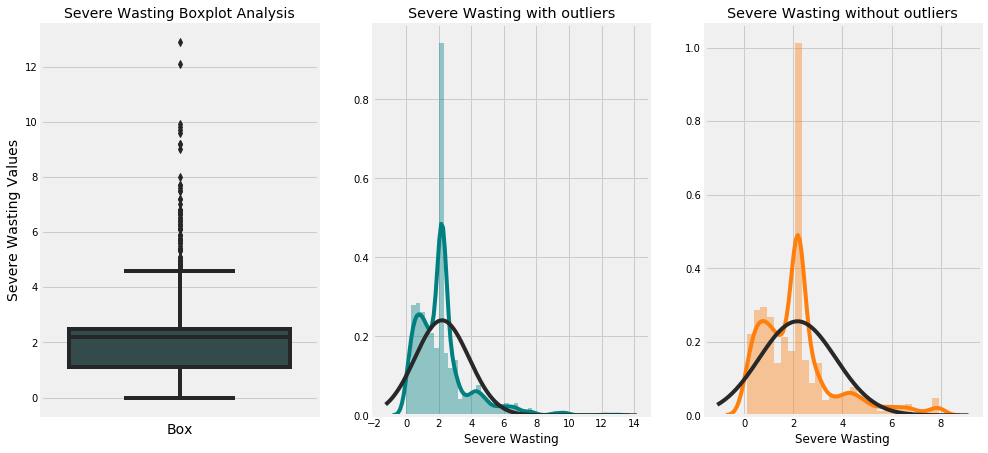

Wasting column --------------------------------------------------------------------------------
no of records with outliers values: 24


Country  Year  Income Classification  \
48                                BANGLADESH  1997                      1   
105                             BURKINA FASO  2003                      0   
106                             BURKINA FASO  2006                      0   
209  DEMOCRATIC PEOPLE'S REP. OF KOREA (THE)  1998                      0   
223                                 DJIBOUTI  2002                      1   

     LDC  LIFD  LLDC or SID2 Survey Sample (N)  Severe Wasting  Wasting  \
48  1.00  1.00          0.00             5,204            6.80    20.70   
105 1.00  1.00          1.00             9,290            9.70    21.20   
106 1.00  1.00          1.00             4,321           12.10    24.40   
209 0.00  1.00          0.00             1,263            2.19    20.80   
223 1.00  1.00          0.00             1,425            9.60    19.40   

     Overweight  Stunting  Underweight  U5 Population ('000s)  
48         2.40     59.60        53.60               16160.17  
105        5.40     43.10        35.20                2360.64  
106        7.00     40.00        35.90                2564.72  
209        6.43     63.90        55.50                2063.74  
223        8.40     27.10        24.40                 105.43

EDA for Wasting column --------------------------------------------------------------------------------


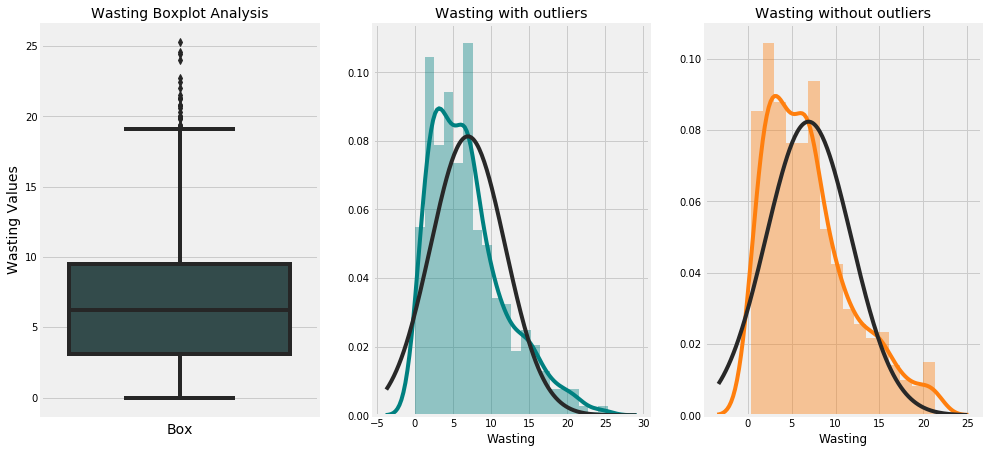

Overweight column --------------------------------------------------------------------------------
no of records with outliers values: 43


Country  Year  Income Classification  LDC  LIFD  LLDC or SID2  \
5   ALBANIA  2000                      2 0.00  0.00          0.00   
6   ALBANIA  2005                      2 0.00  0.00          0.00   
7   ALBANIA  2009                      2 0.00  0.00          0.00   
8   ALBANIA  2017                      2 0.00  0.00          0.00   
13  ALGERIA  2002                      2 0.00  0.00          0.00   

   Survey Sample (N)  Severe Wasting  Wasting  Overweight  Stunting  \
5              1,382            6.20    12.20       30.10     39.20   
6              1,090            3.70     7.30       24.80     26.70   
7              1,489            5.90     9.60       23.20     23.20   
8              2,367            0.50     1.60       16.40     11.30   
13             4,357            5.00     9.60       15.10     24.00   

    Underweight  U5 Population ('000s)  
5         17.00                 279.83  
6          6.60                 219.41  
7          6.30                 179.31  
8          1.50                 176.52  
13        11.10                2877.72

EDA for Overweight column --------------------------------------------------------------------------------


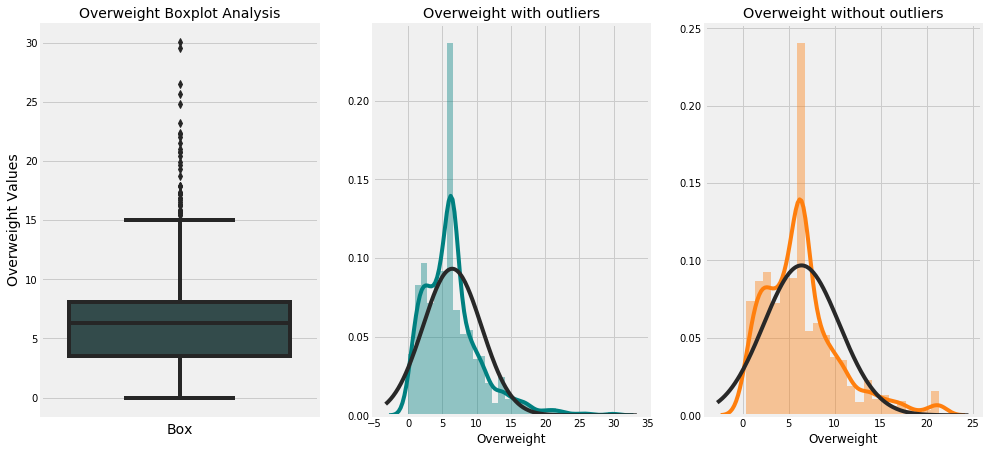

Stunting column --------------------------------------------------------------------------------
no of records with outliers values: 0


Empty DataFrame
Columns: [Country, Year, Income Classification, LDC, LIFD, LLDC or SID2, Survey Sample (N), Severe Wasting, Wasting, Overweight, Stunting, Underweight, U5 Population ('000s)]
Index: []

EDA for Stunting column --------------------------------------------------------------------------------


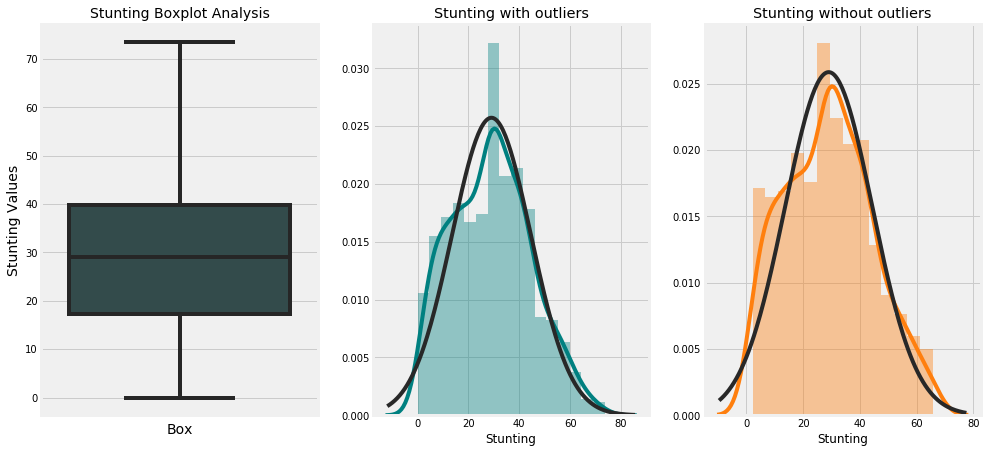

Underweight column --------------------------------------------------------------------------------
no of records with outliers values: 14


Country  Year  Income Classification  LDC  LIFD  LLDC or SID2  \
40  BANGLADESH  1986                      1 1.00  1.00          0.00   
41  BANGLADESH  1990                      1 1.00  1.00          0.00   
42  BANGLADESH  1991                      1 1.00  1.00          0.00   
43  BANGLADESH  1992                      1 1.00  1.00          0.00   
44  BANGLADESH  1993                      1 1.00  1.00          0.00   

   Survey Sample (N)  Severe Wasting  Wasting  Overweight  Stunting  \
40             2,675            2.19    17.30        0.20     70.90   
41             1,914            2.19    17.50        0.60     63.40   
42            32,493            2.60    15.20        0.30     73.60   
43            36,997            3.00    16.10        0.20     71.50   
44            42,826            2.50    14.00        0.40     69.20   

    Underweight  U5 Population ('000s)  
40        66.80               15384.62  
41        61.50               15889.55  
42        61.20               15998.58  
43        60.60               16042.64  
44        56.10               16047.01

EDA for Underweight column --------------------------------------------------------------------------------


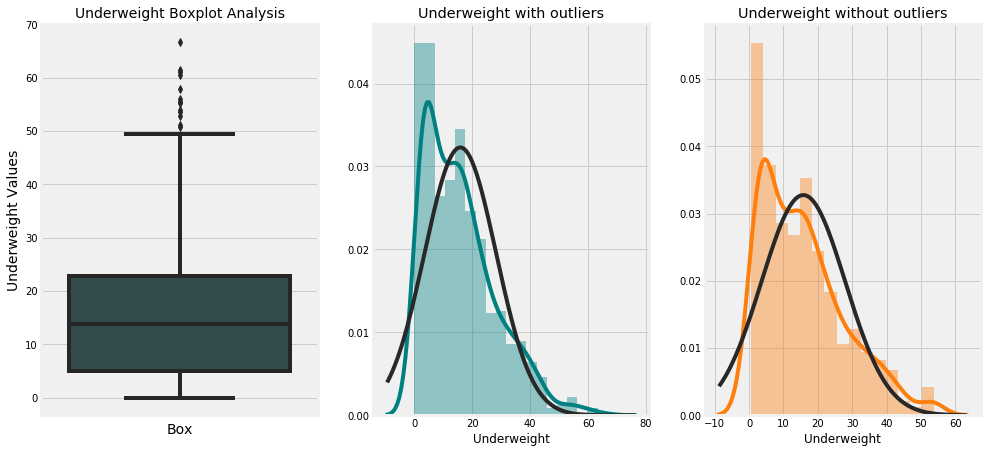

In [9]:
# Outlier, distribution for columns with outliers
boxplotcolumns = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting',
                  'Underweight']
for cols in boxplotcolumns:
    Q3 = data[cols].quantile(0.75)
    Q1 = data[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    count = len(data.loc[(data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))])
    print(f'no of records with outliers values: {count}')
    
    display(data.loc[(data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))].head())
    print(f'EDA for {cols.capitalize()} column', '--'*40)
    odp_plots(data, cols)

del cols, IQR, boxplotcolumns

Observation: There are outliers in the columns plotted above and we also plotted for values without outliers, hardly making any difference. 

# Multivariate Analysis

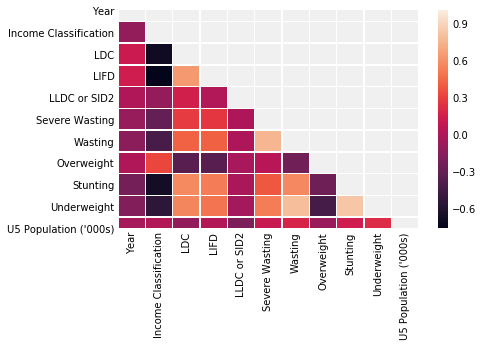

In [10]:
corr = data.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5 )#, annot = True)


In [11]:
# Filter for correlation value greater than threshold
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.7) & (sort < 1)])

Stunting               Underweight             0.83
Underweight            Stunting                0.83
Wasting                Underweight             0.79
Underweight            Wasting                 0.79
LIFD                   Income Classification   0.76
Income Classification  LIFD                    0.76
Severe Wasting         Wasting                 0.76
Wasting                Severe Wasting          0.76
dtype: float64

#### Observation: As expected stunting, underweight and wasting are highly correlated.

# Which country shows highest Underweight percentage? ---> Bangladesh

In [12]:
country = data.loc[:,['Country','Underweight']]
country['percunder'] = country.groupby('Country')['Underweight'].transform('max')
country = country.drop('Underweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

# Which country shows highest Overweight percentage? ---> Albania

In [13]:
country = data.loc[:,['Country','Overweight']]
country['percunder'] = country.groupby('Country')['Overweight'].transform('max')
country = country.drop('Overweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

# Which income class have highest underweight percentage? ---> Lower Middle Income

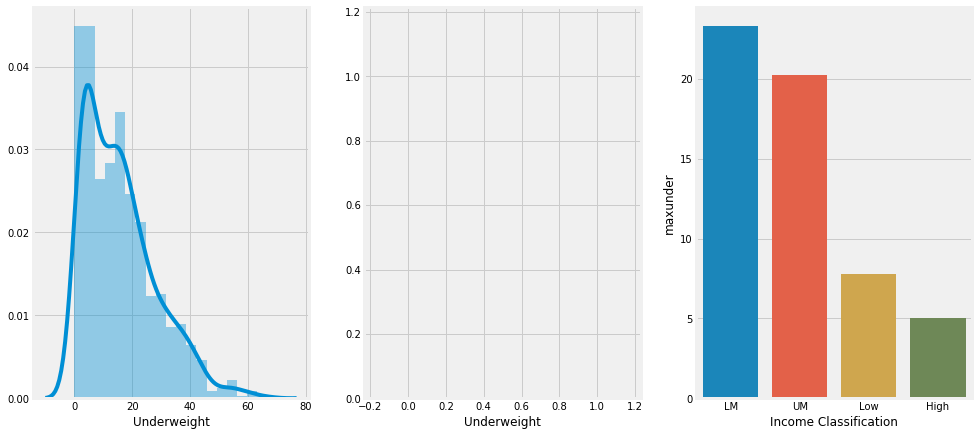

In [14]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
sns.distplot(data['Underweight'], ax=ax1)

df_LM = data.loc[data['Income Classification'] == 'Lower Middle Income']
df_UM = data.loc[data['Income Classification'] == 'Upper Middle Income']
df_Low = data.loc[data['Income Classification'] == 'Low Income']
df_High = data.loc[data['Income Classification'] == 'High Income']

sns.distplot( df_LM['Underweight'],ax = ax2 , color = 'r')
sns.distplot( df_UM['Underweight'],ax = ax2, color = 'g')
sns.distplot( df_Low['Underweight'],ax = ax2, color = 'b')
sns.distplot( df_High['Underweight'],ax = ax2, color = 'y')

df = data.loc[:,['Income Classification','Underweight']]
df['maxunder'] = df.groupby('Income Classification')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()
df = data.loc[:,['Income Classification','Underweight']]
df['maxunder'] = df.groupby('Income Classification')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='Income Classification', y='maxunder')
fig.set(xticklabels = ['LM', 'UM', 'Low', "High"])
plt.show()

In [15]:
df = data.loc[:,['Income Classification','Underweight']]
df['maxunder'] = df.groupby('Income Classification')['Underweight'].transform('max')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = px.pie(df, names='Income Classification', values='maxunder', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label", showlegend=False)
fig.show()

# Underweight percentage in Least Developed Country vs Developed Country

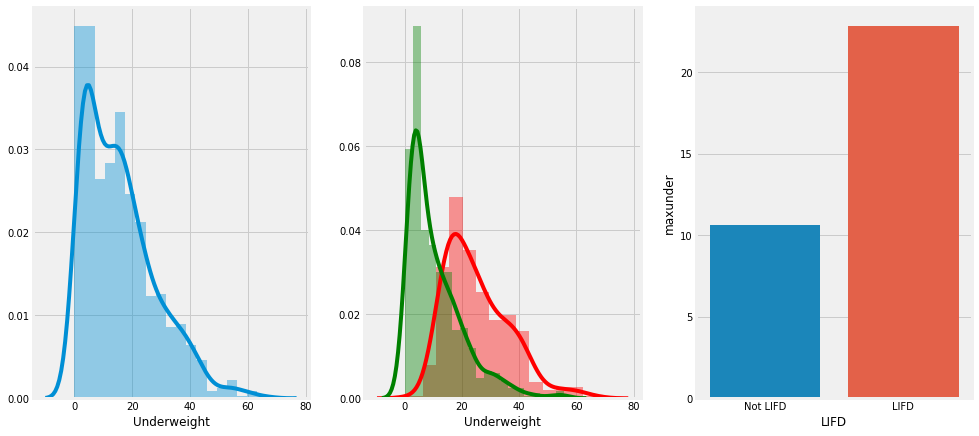

In [16]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
df_with_LDC = data.loc[data['LDC'] == 1]
df_with_DC = data.loc[data['LDC'] == 0]

sns.distplot(data['Underweight'], ax=ax1)
sns.distplot( df_with_LDC['Underweight'],ax = ax2 , color = 'r')
sns.distplot( df_with_DC['Underweight'],ax = ax2, color = 'g')

df = data.loc[:,['LIFD','Underweight']]
df['maxunder'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='LIFD', y='maxunder', ax=ax3)
fig.set(xticklabels = ['Not LIFD', 'LIFD'])
plt.show()


Observation: Least developed country(green) has has more no of underweights and no in developed countries are way lesser considerably .

# Low Income Food Deficient Countries Underweight percentages

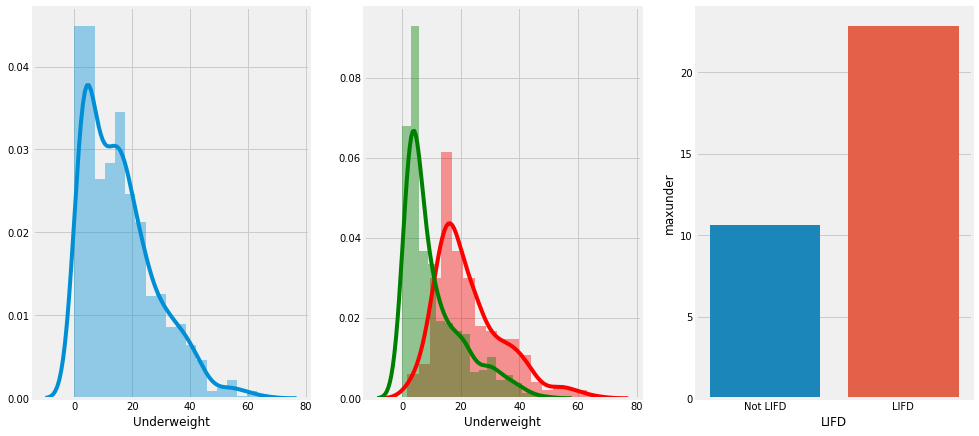

In [17]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
df_with_LIFD = data.loc[data['LIFD'] == 1]
df_with_NLIFD = data.loc[data['LIFD'] == 0]

sns.distplot(data['Underweight'], ax=ax1)
sns.distplot( df_with_LIFD['Underweight'],ax = ax2 , color = 'r')
sns.distplot( df_with_NLIFD['Underweight'],ax = ax2, color = 'g')

df = data.loc[:,['LIFD','Underweight']]
df['maxunder'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()
df = data.loc[:,['LIFD','Underweight']]
df['maxunder'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='LIFD', y='maxunder')
fig.set(xticklabels = ['Not LIFD', 'LIFD'])
plt.show()

# Underweight Analysis according to Income Group

In [18]:
data["Income Classification"].value_counts()

1    335
2    281
0    225
3     83
Name: Income Classification, dtype: int64

## Landlocked Developing Countries vs Small Island Developing states vs Others ---> Others

In [19]:
df = data.loc[:,['LLDC or SID2','Underweight']]
df['maxunder'] = df.groupby('LLDC or SID2')['Underweight'].transform('max')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = px.pie(df, names='LLDC or SID2', values='maxunder', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label", showlegend=False)
fig.show()

# Severe Wasting
### This is the % of children aged 0–59 months who are below minus three standard deviations from median weight-for-height

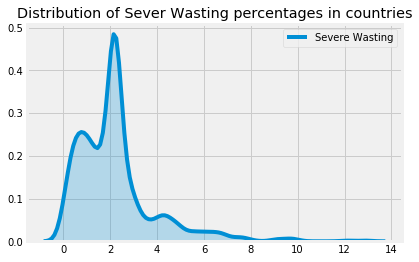

In [20]:
sns.kdeplot(data=data['Severe Wasting'], shade=True)
plt.title('Distribution of Sever Wasting percentages in countries')
plt.show()

We can notice from the distribution plot that the percentage values o as high as 12% in some countries.

From the scatter plot it can be noticed that high severe wasting percentages is mostly found for low survey sample sizes.

# Severe Wasting - Wasting - Overweight - Underweight

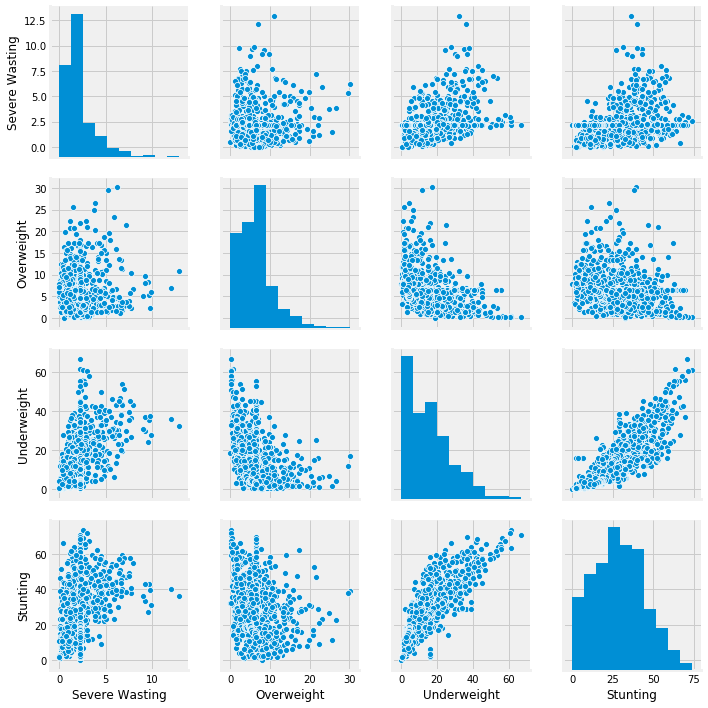

In [21]:
sns.pairplot(data[['Severe Wasting','Overweight','Underweight', 'Stunting']])
plt.show()

# U5 Population
### Population of that country under the age of 5

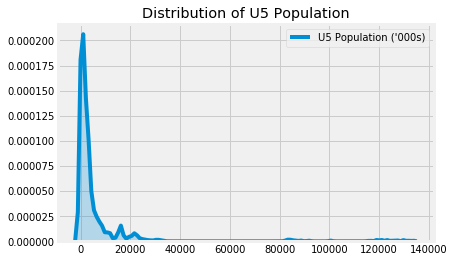

In [22]:
sns.kdeplot(data=data['U5 Population (\'000s)'], shade=True)
plt.title('Distribution of U5 Population')
plt.show()

# Relation of Underweight % to U5 population

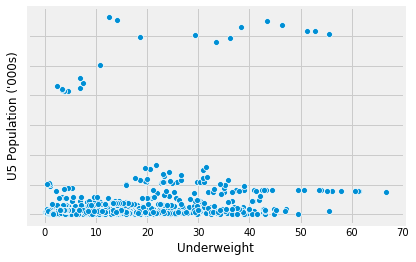

In [23]:
fig = sns.scatterplot(data=data, x='Underweight', y='U5 Population (\'000s)')
fig.set(yticklabels=[])
plt.show()

It can be clearly noticed that for highest populations the underweight percentage is also quite high.

# Which country shows highest underweight count? ---> India

In [24]:
df = data.loc[:,['Country','Underweight','U5 Population (\'000s)']]
df['underweight_count'] = (df['U5 Population (\'000s)'] * df['Underweight'])/100
df.drop(['Underweight','U5 Population (\'000s)'], axis=1, inplace=True)
df['undermean'] = df.groupby('Country')['underweight_count'].transform('mean')
df = df.drop('underweight_count', axis=1).drop_duplicates().sort_values('undermean', ascending=False).head()

fig = px.pie(df, names='Country', values='undermean', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

The reason behind this exceptional percentage may be due to the population count or any other factor as well.